# Weighted regression of global temperature data

The goal is to come up with a predictive model for temperatures based on data from 
https://datahub.io/core/global-temp



In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


### Download the data

In [4]:
data = pd.read_csv("Temperature.csv")
data.head(3)


,Unnamed: 0,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,var
0,0,1880,-0.17,-0.23,-0.08,-0.15,-0.08,-0.20,-0.17,-0.09,...,-0.22,-0.21,-0.17,-0.16,***,***,-0.10,-0.15,-0.19,5.0
1,1,1881,-0.19,-0.13,0.04,0.06,0.07,-0.17,0.02,-0.02,...,-0.2,-0.17,-0.05,-0.07,-0.08,-0.16,0.06,-0.06,-0.17,5.0
2,2,1882,0.18,0.15,0.06,-0.15,-0.13,-0.22,-0.15,-0.06,...,-0.23,-0.15,-0.35,-0.1,-0.07,0.09,-0.08,-0.14,-0.17,5.0


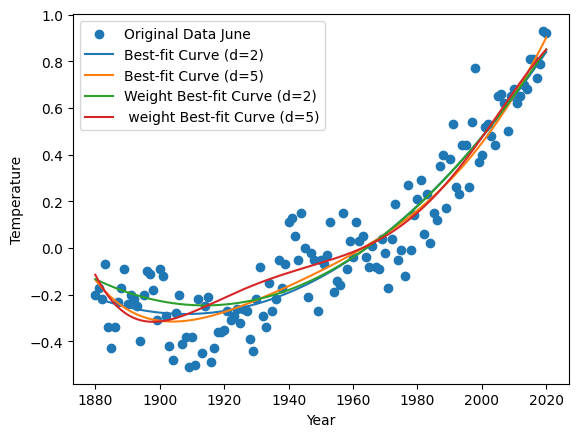

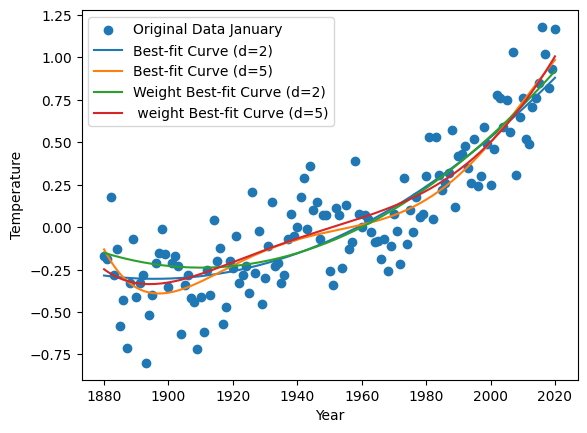

In [12]:
names = data.columns

years = data['Year']
june_temps = data['Jun']
january_temps = data['Jan']
variances = data['var']  # Adjust if column name is different


d2_coeff= np.polyfit(years, june_temps, 2)
fit_y2 = np.polyval(d2_coeff, years)

d5_coeff= np.polyfit(years, june_temps, 5)
fit_y5 = np.polyval(d5_coeff, years)

weight_d2_coeff= np.polyfit(years, june_temps, 2, w=1/variances)
weight_fit_y2 = np.polyval(weight_d2_coeff, years)

weight_d5_coeff= np.polyfit(years, june_temps, 5, w=1/variances)
weight_fit_y5 = np.polyval(weight_d5_coeff, years)

# Plot the original data points

plt.scatter(years, june_temps, label='Original Data June')
plt.plot(years, fit_y2, label='Best-fit Curve (d=2)')
plt.plot(years, fit_y5, label='Best-fit Curve (d=5)')
plt.plot(years, weight_fit_y2, label='Weight Best-fit Curve (d=2)')
plt.plot(years, weight_fit_y5, label=' weight Best-fit Curve (d=5)')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()


d2_coeff= np.polyfit(years, january_temps, 2)
fit_y2 = np.polyval(d2_coeff, years)

d5_coeff= np.polyfit(years, january_temps, 5)
fit_y5 = np.polyval(d5_coeff, years)

weight_d2_coeff= np.polyfit(years, january_temps, 2, w=1/variances)
weight_fit_y2 = np.polyval(weight_d2_coeff, years)

weight_d5_coeff= np.polyfit(years, january_temps, 5, w=1/variances)
weight_fit_y5 = np.polyval(weight_d5_coeff, years)

# Plot the original data points

plt.scatter(years, january_temps, label='Original Data January')
plt.plot(years, fit_y2, label='Best-fit Curve (d=2)')
plt.plot(years, fit_y5, label='Best-fit Curve (d=5)')
plt.plot(years, weight_fit_y2, label='Weight Best-fit Curve (d=2)')
plt.plot(years, weight_fit_y5, label=' weight Best-fit Curve (d=5)')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()


